In [1]:
import tensorflow  as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

In [2]:
gt_data=pd.read_csv("gas_turbines.csv")
gt_data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
gt_data.shape

(15039, 11)

In [4]:
gt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
gt_data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [6]:
gas_turbines=gt_data.drop('TEY',axis=1)
gas_turbines.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [7]:
gas_data=pd.DataFrame(pd.cut(gt_data.TEY,bins=3,labels=['Low','Medium','High']))
gas_data

,TEY
0,Low
1,Low
2,Low
3,Low
4,Low
...,...
15034,Low
15035,Low
15036,Low
15037,Low


In [8]:
#LABEL ENCODER

In [9]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
data1 = pd.DataFrame(scale.fit_transform(gas_turbines),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX'])
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.121431,0.141693,0.710578


In [10]:
data=pd.concat([data1,gas_data],axis=1)
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548,Low
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134,Low
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791,Low
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984,Low
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087,Low


In [11]:
data[data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY


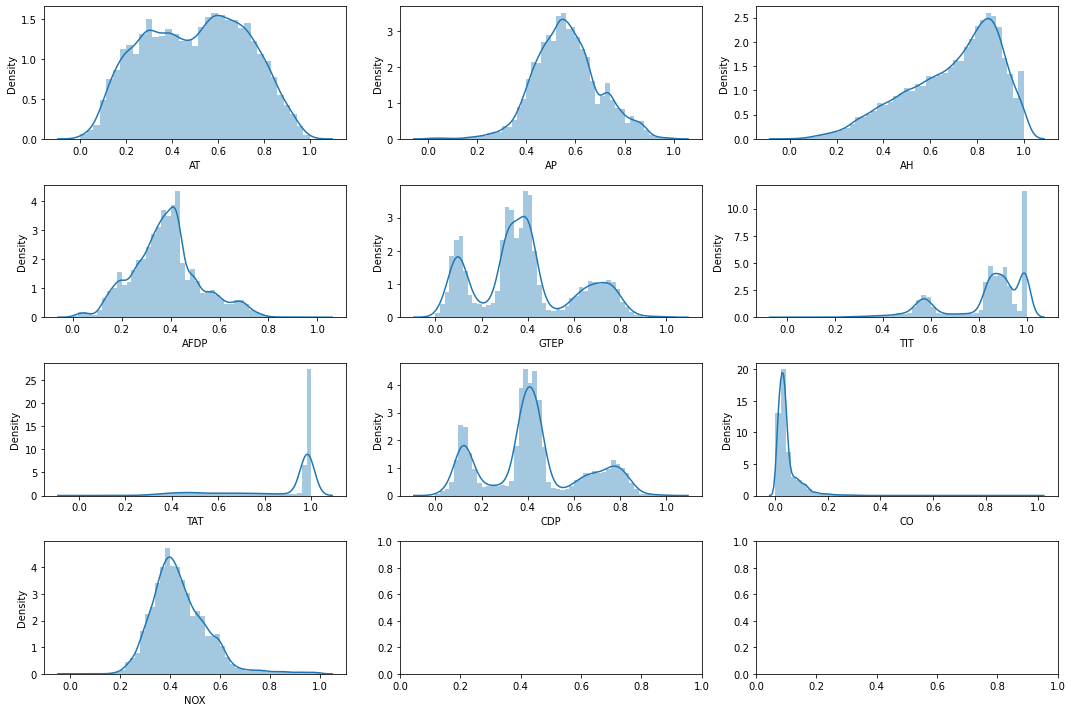

In [12]:
import warnings 
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.distplot(data.AT, ax=ax[0,0])
sns.distplot(data.AP, ax=ax[0,1])
sns.distplot(data.AH, ax=ax[0,2])
sns.distplot(data.AFDP, ax=ax[1,0])
sns.distplot(data.GTEP, ax=ax[1,1])
sns.distplot(data.TIT, ax=ax[1,2])
sns.distplot(data.TAT, ax=ax[2,0])
sns.distplot(data.CDP, ax=ax[2,1])
sns.distplot(data.CO, ax=ax[2,2])
sns.distplot(data.NOX, ax=ax[3,0])

plt.tight_layout()
plt.show()

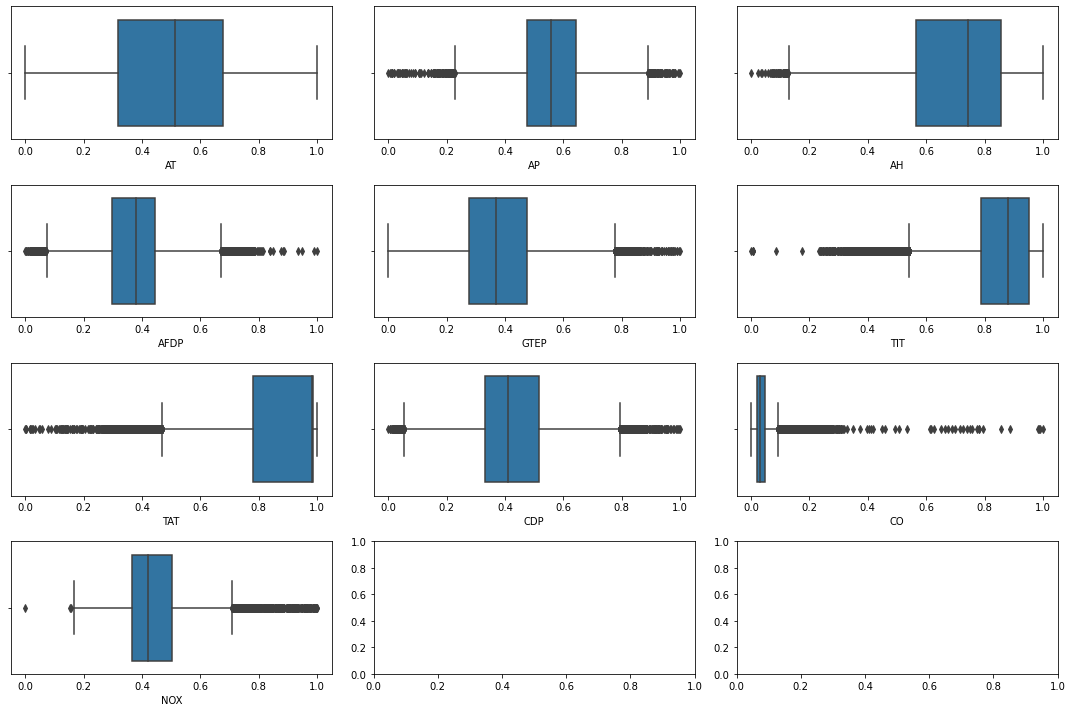

In [13]:
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.boxplot(data.AT, ax=ax[0,0])
sns.boxplot(data.AP, ax=ax[0,1])
sns.boxplot(data.AH, ax=ax[0,2])
sns.boxplot(data.AFDP, ax=ax[1,0])
sns.boxplot(data.GTEP, ax=ax[1,1])
sns.boxplot(data.TIT, ax=ax[1,2])
sns.boxplot(data.TAT, ax=ax[2,0])
sns.boxplot(data.CDP, ax=ax[2,1])
sns.boxplot(data.CO, ax=ax[2,2])
sns.boxplot(data.NOX, ax=ax[3,0])

plt.tight_layout()
plt.show()

In [14]:
X = data.drop(axis=0,columns="TEY").values
Y = data["TEY"].values

In [15]:
X

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [16]:
Y

['Low', 'Low', 'Low', 'Low', 'Low', ..., 'Low', 'Low', 'Low', 'Low', 'Low']
Length: 15039
Categories (3, object): ['Low' < 'Medium' < 'High']

In [17]:
seed = 7
np.random.seed(seed)

In [18]:
model = Sequential()
model.add(Dense(15, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(10,  kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 336
Trainable params: 336
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]* scores[1]*100))

470/470 [==============================] - 0s 668us/step - loss: 0.5898 - accuracy: 1.3299e-04
accuracy: 0.00%


In [19]:
model.history.history.keys()

dict_keys([])